Minimum to load the model

* Run setup paths


# 0. Setup Paths

In [1]:
import os

In [2]:
os.environ['path']

'C:\\ProgramData\\Anaconda3\\envs\\TFODCourse;C:\\ProgramData\\Anaconda3\\envs\\TFODCourse\\Library\\mingw-w64\\bin;C:\\ProgramData\\Anaconda3\\envs\\TFODCourse\\Library\\usr\\bin;C:\\ProgramData\\Anaconda3\\envs\\TFODCourse\\Library\\bin;C:\\ProgramData\\Anaconda3\\envs\\TFODCourse\\Scripts;C:\\ProgramData\\Anaconda3\\envs\\TFODCourse\\bin;C:\\ProgramData\\Anaconda3\\condabin;C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v11.4\\bin;C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v11.4\\libnvvp;C:\\Program Files (x86)\\Common Files\\Intel\\Shared Libraries\\redist\\intel64_win\\compiler;C:\\Program Files (x86)\\Common Files\\Intel\\Shared Libraries\\redist\\intel64\\compiler;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0;C:\\Windows\\System32\\OpenSSH;C:\\Program Files (x86)\\NVIDIA Corporation\\PhysX\\Common;C:\\Program Files\\Git\\cmd;C:\\WINDOWS\\system32;C:\\WINDOWS;C:\\WINDOWS\\System32\\Wbem;C:\\WINDOWS

In [3]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet_tuned' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [4]:


paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [5]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [6]:
paths.values()

dict_values(['Tensorflow\\workspace', 'Tensorflow\\scripts', 'Tensorflow\\models', 'Tensorflow\\workspace\\annotations', 'Tensorflow\\workspace\\images', 'Tensorflow\\workspace\\models', 'Tensorflow\\workspace\\pre-trained-models', 'Tensorflow\\workspace\\models\\my_ssd_mobnet_tuned', 'Tensorflow\\workspace\\models\\my_ssd_mobnet_tuned\\export', 'Tensorflow\\workspace\\models\\my_ssd_mobnet_tuned\\tfjsexport', 'Tensorflow\\workspace\\models\\my_ssd_mobnet_tuned\\tfliteexport', 'Tensorflow\\protoc'])

In [7]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [8]:
# https://www.tensorflow.org/install/source_windows

In [9]:
if os.name=='nt':
    !pip install wget
    import wget

In [10]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

* Raspberry Pi is going to need a model that is light weight - so mobilenet is used unless you have a use case where you need accuracy
* This model is going to compress the 640x 640 image that was taken and it will turn it into 320x320
* Mobile Net (with TF Object detection) is going to do the image augmentation for you

* Mask R-CNN can actually be used for image segmentation - feels like this could be used to put the mask in for rotoscoping
* It almost sounds like he might have an approach for how to train on the cloud

* A lot of TFOD uses protocol buffers

In [11]:
# !pip uninstall pycocotools -y
!pip install pycocotools

In [12]:
!pip install pillow

In [13]:
# !pip uninstall tensorflow -y
#!pip install tensorflow==2.6.0

In [14]:
!pip install tensorflow-gpu==2.6.0

In [15]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying obj

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-38: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-38: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-38: module MAY be using inspect.stack
error: absl-py 0.13.0 is installed but absl-py<0.13,>=0.9 is required by {'tensorflow-metadata'}


byte-compiling build\bdist.win-amd64\egg\deployment\__init__.py to __init__.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\nets\alexnet.py to alexnet.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\nets\alexnet_test.py to alexnet_test.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\nets\cifarnet.py to cifarnet.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\nets\cyclegan.py to cyclegan.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\nets\cyclegan_test.py to cyclegan_test.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\nets\dcgan.py to dcgan.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\nets\dcgan_test.py to dcgan_test.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\nets\i3d.py to i3d.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\nets\i3d_test.py to i3d_test.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\nets\i3d_utils.py to i3d_utils.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\nets\incepti

In [16]:
! pip install apache-beam avro-python3 contextlib2 gin-config google-api-python-client kaggle

* 1:44:45 at model garden - is where I stopped

In [18]:
! pip install apache-beam avro-python3 contextlib2 gin-config google-api-python-client kaggle

In [17]:
os.environ['path']

'C:\\ProgramData\\Anaconda3\\envs\\TFODCourse;C:\\ProgramData\\Anaconda3\\envs\\TFODCourse\\Library\\mingw-w64\\bin;C:\\ProgramData\\Anaconda3\\envs\\TFODCourse\\Library\\usr\\bin;C:\\ProgramData\\Anaconda3\\envs\\TFODCourse\\Library\\bin;C:\\ProgramData\\Anaconda3\\envs\\TFODCourse\\Scripts;C:\\ProgramData\\Anaconda3\\envs\\TFODCourse\\bin;C:\\ProgramData\\Anaconda3\\condabin;C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v11.4\\bin;C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v11.4\\libnvvp;C:\\Program Files (x86)\\Common Files\\Intel\\Shared Libraries\\redist\\intel64_win\\compiler;C:\\Program Files (x86)\\Common Files\\Intel\\Shared Libraries\\redist\\intel64\\compiler;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0;C:\\Windows\\System32\\OpenSSH;C:\\Program Files (x86)\\NVIDIA Corporation\\PhysX\\Common;C:\\Program Files\\Git\\cmd;C:\\WINDOWS\\system32;C:\\WINDOWS;C:\\WINDOWS\\System32\\Wbem;C:\\WINDOWS

In [18]:
# !pip uninstall absl-py -y
# !pip install absl-py

In [19]:
!pip install numpy --upgrade

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\envs\\TFODCourse\\Lib\\site-packages\\~0mpy\\.libs\\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.




  Using cached numpy-1.21.2-cp38-cp38-win_amd64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


In [20]:
!pip install typeguard

In [21]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.8.11: C:\ProgramData\Anaconda3\envs\TFODCourse\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-09-07 12:13:34.877385: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-07 12:13:35.666068: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21674 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:4b:00.0, compute capability: 8.6
C:\ProgramData\Anaconda3\envs\TFODCourse\lib\site-packages\object_detection-0.1-py3.8.egg\object_detection\builders\model_builder.py:1088: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Building ex

In [22]:
import object_detection

In [23]:
#!pip list

# 2. Create Label Map

* Do not run this part if you alread have the model trained

In [26]:
files['LABELMAP']
# paths['PROTOC_PATH']

'Tensorflow\\workspace\\annotations\\label_map.pbtxt'

In [43]:
files['LABELMAP']

'Tensorflow\\workspace\\annotations\\label_map.pbtxt'

In [41]:

labels = [{'name':'ThumbsUp', 'id':1}, {'name':'ThumbsDown', 'id':2}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [38]:
# OPTIONAL IF RUNNING ON COLAB
# ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
# if os.path.exists(ARCHIVE_FILES):
#   !tar -zxvf {ARCHIVE_FILES}

In [27]:
files['TF_RECORD_SCRIPT']

'Tensorflow\\scripts\\generate_tfrecord.py'

In [28]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [30]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [31]:
paths['CHECKPOINT_PATH']

'Tensorflow\\workspace\\models\\my_ssd_mobnet_tuned'

In [32]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

* Do not updated this if Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config has already been adjusted


In [34]:
files['PIPELINE_CONFIG']

'Tensorflow\\workspace\\models\\my_ssd_mobnet_tuned\\pipeline.config'

In [35]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [36]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [37]:
type(config)

dict

In [38]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [45]:


pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [46]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [47]:
#!pip install typeguard

In [48]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [53]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=3000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

* Run the following in the Pycharm terminal

In [54]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet_tuned --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet_tuned\pipeline.config --num_train_steps=3000


In [69]:
!{command}

^C


2021-08-31 16:39:18.582730: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-08-31 16:39:19.053637: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21674 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:4b:00.0, compute capability: 8.6
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0831 16:39:19.628149  9228 mirrored_strategy.py:369] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 2000
I0831 16:39:19.633149  9228 config_util.py:552] Maybe overwriting train_steps: 2000
INFO:tensorflow:M

# 7. Evaluate the Model

In [55]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

* run the following from the PyCharm terminal


In [56]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet_tuned --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet_tuned\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet_tuned


In [58]:
# !{command}

^C


# 7.1 View in Tensorboard

In [77]:
# !pip uninstall google-auth -y
!pip install google-auth --upgrade

  Using cached google_auth-2.0.2-py2.py3-none-any.whl (152 kB)
  Attempting uninstall: google-auth
    Found existing installation: google-auth 1.35.0
    Uninstalling google-auth-1.35.0:
      Successfully uninstalled google-auth-1.35.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.6.0 requires google-auth<2,>=1.6.3, but you have google-auth 2.0.2 which is incompatible.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.21.2 which is incompatible.
tensorflow-gpu 2.6.0 requires numpy~=1.19.2, but you have numpy 1.21.2 which is incompatible.


In [78]:
# !pip uninstall Werkzeug -y
!pip install Werkzeug --upgrade

In [79]:
# !pip uninstall tensorboard-plugin-wit -y
!pip install tensorboard-plugin-wit --upgrade

# 8. Load Train Model From Checkpoint

* After training and evaluation, you need to actually load your model back into memory so taht it can be used

In [75]:
paths['CHECKPOINT_PATH']

'Tensorflow\\workspace\\models\\my_ssd_mobnet_tuned'

In [76]:
files['PIPELINE_CONFIG']

'Tensorflow\\workspace\\models\\my_ssd_mobnet_tuned\\pipeline.config'

In [66]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [67]:
# Why is this failing to find the checkpoint - seems like the checkpoint should already be there
# D:\python\tmp\tfodcourse\Tensorflow\workspace\models\my_ssd_mobnet has the checkpoints but they are not getting picked up

In [86]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
# ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-5')).expect_partial()
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [87]:
# This is going to detect from an image when the image is not there

In [88]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [89]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [90]:
paths['IMAGE_PATH']

'Tensorflow\\workspace\\images'

In [91]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'livelong.f41928a2-09c0-11ec-9de1-34cff6fc365d.jpg')

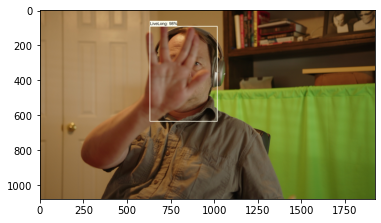

In [92]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [ ]:
!pip uninstall opencv-python-headless -y

* You need to press q when you have the object selection screen engaged in order to disengage

In [93]:
#cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture(1)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [94]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [95]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [96]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet_tuned\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet_tuned --output_directory=Tensorflow\workspace\models\my_ssd_mobnet_tuned\export


In [97]:
!{command}

2021-09-07 12:47:36.165903: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-07 12:47:36.742726: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21320 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:4b:00.0, compute capability: 8.6
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0907 12:47:40.565094 11860 deprecation.py:611] From C:\ProgramData\Anaconda3\envs\TFODCourse\lib\site-packages\tensorflow\python\autograph\impl\api.py:463: ca